# Homework 1
---
Jordan Ott

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import pandas as pd

np.random.seed(0)

# Problem 1

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value is the last column
X = iris[:,:-1] # features are the other columns

print('Number of data points:',X.shape[0],'Number of features:',X.shape[1])

Number of data points: 148 Number of features: 4


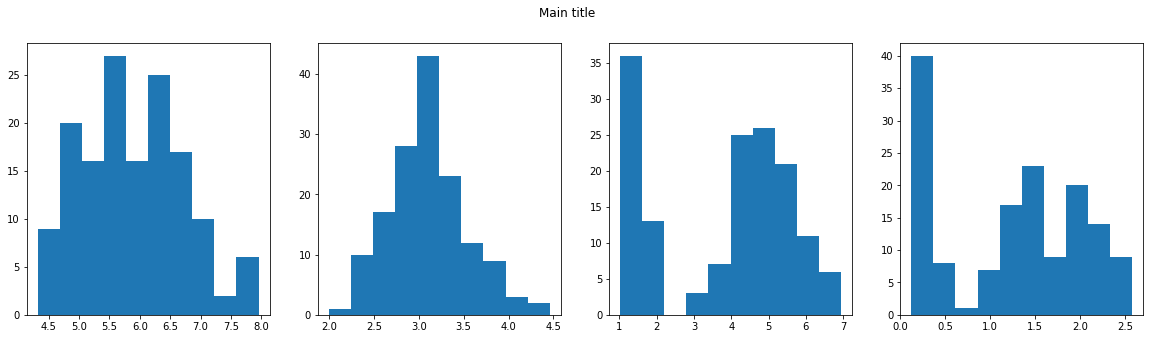

In [3]:
fig=plt.figure(figsize=(20,5))
for i in range(1,X.shape[1]+1):
    ax=fig.add_subplot(1,4,i)        
    ax.hist(X[:,i-1])

fig.suptitle('Main title') # or plt.suptitle('Main title')
plt.show()

In [4]:
print('Mean:',X.mean(axis=0),'\nSTD:',X.std(axis=0))

Mean: [5.90010376 3.09893092 3.81955484 1.25255548] 
STD: [0.83340207 0.43629184 1.75405711 0.75877246]


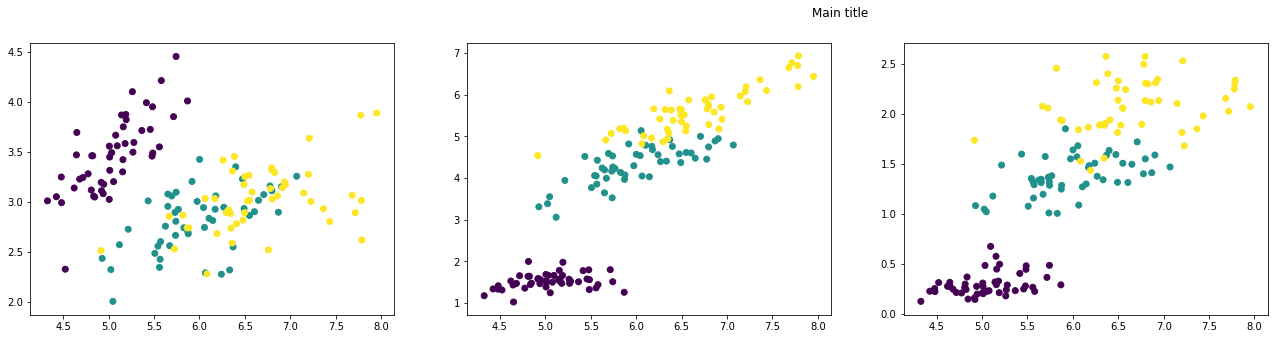

In [5]:
fig=plt.figure(figsize=(30,5))
for i in range(1,X.shape[1]):
    ax=fig.add_subplot(1,4,i)        
    ax.scatter(X[:,0],X[:,i],c=Y)

fig.suptitle('Main title') # or plt.suptitle('Main title')
plt.show()

# Problem 2

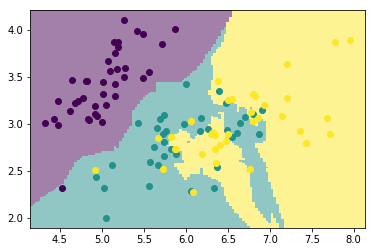

In [6]:
K = 5
X,Y = ml.shuffleData(X,Y)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75)

knn = ml.knn.knnClassify( Xtr[:,:2], Ytr, K)
YvaHat = knn.predictSoft( Xva[:,:2] )
ml.plotClassify2D( knn, Xtr[:,:2], Ytr )

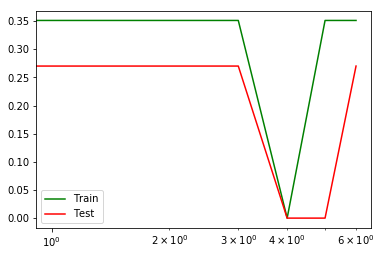

In [7]:
errTrain,errTest = [],[]
K=[1,2,5,10,50,100,200]

for i,k in enumerate(K):
    learner = ml.knn.knnClassify( Xtr[:,:2], Ytr, k)
    YtrHat = learner.predictSoft( Xtr[:,:2] )
    YvaHat = learner.predictSoft( Xva[:,:2] )
    
    train_err = np.sum(Ytr == np.argmax(YtrHat)) / float(len(YtrHat))
    test_err = np.sum(Yva == np.argmax(YvaHat)) / float(len(YvaHat))
    
    errTrain.append(train_err)
    errTest.append(test_err)
                       
plt.semilogx(errTrain,c='green',label='Train')
plt.semilogx(errTest,c='red',label='Test')
plt.legend()
None

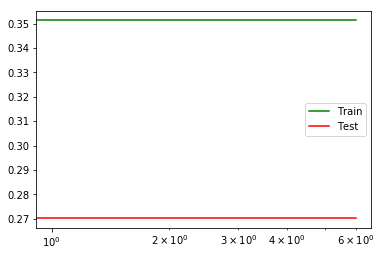

In [8]:
errTrain,errTest = [],[]
K=[1,2,5,10,50,100,200]

for i,k in enumerate(K):
    learner = ml.knn.knnClassify( Xtr, Ytr, k)
    YtrHat = learner.predictSoft( Xtr )
    YvaHat = learner.predictSoft( Xva )
    
    train_err = np.sum(Ytr == np.argmax(YtrHat)) / float(len(YtrHat))
    test_err = np.sum(Yva == np.argmax(YvaHat)) / float(len(YvaHat))
    
    errTrain.append(train_err)
    errTest.append(test_err)
                       
plt.semilogx(errTrain,c='green',label='Train')
plt.semilogx(errTest,c='red',label='Test')
plt.legend()
None

# Problem 3

In [9]:
D = [[0,0,1,1,0,-1],[1,1,0,1,0,-1],[0,1,1,1,1,-1],[1,1,1,1,0,-1],[0,1,0,0,0,-1],[1,0,1,1,1,1],[0,0,1,0,0,1],[1,0,0,0,0,1],[1,0,1,1,0,1],[1,1,1,1,1,-1]]
df = pd.DataFrame(data=D, columns=['author','long','research','grade','lottery','read'])

df

,author,long,research,grade,lottery,read
0,0,0,1,1,0,-1
1,1,1,0,1,0,-1
2,0,1,1,1,1,-1
3,1,1,1,1,0,-1
4,0,1,0,0,0,-1
5,1,0,1,1,1,1
6,0,0,1,0,0,1
7,1,0,0,0,0,1
8,1,0,1,1,0,1
9,1,1,1,1,1,-1


In [10]:
def prob(x, v):
    return round(x[x == v].count() / float(x.count()),2)

for col in df.columns.tolist()[:-1]:
    pos = df[df['read'] == 1][col]
    neg = df[df['read'] == -1][col]
    
    print('P({}|{}):'.format(col,'read'), prob(pos,1),'P(~{}|{}):'.format(col,'read'),prob(pos,0),'P({}|~{}):'.format(col,'read'), prob(neg,1),'P(~{}|~{}):'.format(col,'read'),prob(neg,0) )

P(author|read): 0.75 P(~author|read): 0.25 P(author|~read): 0.5 P(~author|~read): 0.5
P(long|read): 0.0 P(~long|read): 1.0 P(long|~read): 0.83 P(~long|~read): 0.17
P(research|read): 0.75 P(~research|read): 0.25 P(research|~read): 0.67 P(~research|~read): 0.33
P(grade|read): 0.5 P(~grade|read): 0.5 P(grade|~read): 0.83 P(~grade|~read): 0.17
P(lottery|read): 0.25 P(~lottery|read): 0.75 P(lottery|~read): 0.33 P(~lottery|~read): 0.67


## Statement of Collaboration  
I did not collaborate with anyone